# #1: Import credit card approval dataset from UCI Machine Learning Repo

In [206]:
#Import pandas
import pandas as pd

#Import Numpy
import numpy as np

In [207]:
#Read in data as CSV into dataframe
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')

#Check to see if column labeled properly
df.head()

b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +


#### **PROBLEM
**The columns don't have names in the data. Add column names "A1 ... A16"

In [208]:
#Assign column names
df.columns=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]

In [209]:
#Check to see if column labeled properly
df.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
1  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
2  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
3  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   +
4  b  32.08  4.000  u  g  m  v  2.50  t   f    0   t   g  00360    0   +

--------------------------------------------------------------------------------------------------------------------
# #2: Find basic info about data
1. Check number of rows
2. Check data types for each column
3. Check for missing values

In [210]:
#Number of rows, columns
df.shape

(689, 16)

In [211]:
#Find missing values count in rows for each column
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

#### **PROBLEM with missing values
**Missing values do not correspond with crx.names text file.
1. Missing values -- according to crx.names:<br>
    A1:  12<br>
    A2:  12<br>
    A4:   6<br>
    A5:   6<br>
    A6:   9<br>
    A7:   9<br>
    A14: 13<br>
---------------------------------------------------------------------------------------------------------------------

In [212]:
#Quick info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
A1     689 non-null object
A2     689 non-null object
A3     689 non-null float64
A4     689 non-null object
A5     689 non-null object
A6     689 non-null object
A7     689 non-null object
A8     689 non-null float64
A9     689 non-null object
A10    689 non-null object
A11    689 non-null int64
A12    689 non-null object
A13    689 non-null object
A14    689 non-null object
A15    689 non-null int64
A16    689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


#### **PROBLEM with column dtypes
**Column dtypes do not correspond with imported data. 
1. Column dtypes -- according to crx.names:<br>
    A1:	b, a;<br>
    A2:	continuous;<br>
    A3:	continuous;<br>
    A4:	u, y, l, t;<br>
    A5:	g, p, gg;<br>
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff;<br>
    A7:	v, h, bb, j, n, z, dd, ff, o;<br>
    A8:	continuous;<br>
    A9:	t, f;<br>
    A10:	t, f;<br>
    A11:	continuous;<br>
    A12:	t, f;<br>
    A13:	g, p, s;<br>
    A14:	continuous;<br>
    A15:	continuous;<br>
    A16: +,-(class attribute)<br>
2. Column dtypes that need to be CONVERTED from object to numeric: A2, A14
-------------------------------------------------------------------------------------------------------------------


# #3. Data Prep
1. Missing data: change to NaN, then drop rows
2. Data Types: Correct data type of 2 incorrect columns to numeric
3. Convert A16 class column values(-/+) to binary (0/1)

### Missing value replaced with "?" in dataset . Replace "?" with NaN.

In [213]:
#Replace ? with NaN in all columns/rows
df.replace('?', np.nan, inplace=True)

In [214]:
#Recheck missing values count in rows for each column
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

#### 37 cases with missing values (5% of data) --> Okay to drop.

In [215]:
#Check number of rows BEFORE dropping
df.shape

(689, 16)

In [216]:
#Drop the rows containing any NaN with .dropna
df.dropna(inplace=True)

In [217]:
#Check number of rows AFTER dropping
df.shape

(652, 16)

-------------------------------------------------------------------------------------------------------------------
### Dtypes of column A2 & A14 are incorrect. Change to numeric.

In [218]:
df.A2=pd.to_numeric(df["A2"]) #A2 to numeric
df.A14=pd.to_numeric(df["A14"])#A14 to numeric

In [219]:
#Recheck dtypes of each column
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int64
A15      int64
A16     object
dtype: object

-------------------------------------------------------------------------------------------------------------------
### Convert A16 attributes object (+/-) to binary (1/0) --> sklearn-friendly

In [220]:
#Check dtype of A16 (object)
df.dtypes.A16

dtype('O')

In [221]:
# Replace "+" with 1
df.replace(to_replace="+", value=1, inplace=True) 

# Replace "–" with 0
df.replace(to_replace="-", value=0, inplace=True)

In [222]:
#Recheck dtype of A16 (integer)
df.dtypes.A16

dtype('int64')

-------------------------------------------------------------------------------------------------------------------
# #4: Features & class for scikit-learn

### Convert textual feature values to numeric values using Pandas’ get_dummies function 

In [223]:
#Convert textural feature data (i.e. all feature-columns -- all columns except A16)
df_features = pd.get_dummies(df.loc[:,df.columns!="A16"])

#Assign binary class data (i.e. class-column -- column A16)
df_class = df.A16

### Assign feature data to X, class data to Y (for Train/Test fitting)

In [224]:
#Data for predicting features =  X
X = df_features

#Data for prediction class = Y
Y = df_class

-------------------------------------------------------------------------------------------------------------------
# #5: Create/Split Training and Testing Sets

In [225]:
#Import test/train split library
from sklearn.model_selection import train_test_split

In [226]:
#Create training set, testing set with a 75/25  split (75% training, 25% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [227]:
#Check row count for (X train + X test) & (Y train + Y test), both sshould equal 652
print(
    "Count for X (train/test):\n\t",
    "(X_train) + (X_test) = 652\n\t      ",
    len(X_train), "+", len(X_test),"=",(len(X_train)+len(X_test)), #X_train + X_test = check for 652
    "\n\nCount for Y (train/test):\n\t",
    "(Y_train) + (Y_test) = 652\n\t      ",
    len(Y_train), "+", len(Y_test),"=",(len(Y_train)+len(Y_test)) #Y_train + Y_test = check for 652
     )

Count for X (train/test):
	 (X_train) + (X_test) = 652
	       489 + 163 = 652 

Count for Y (train/test):
	 (Y_train) + (Y_test) = 652
	       489 + 163 = 652


-------------------------------------------------------------------------------------------------------------------
# #6: Decision Trees: Train, predict with test, & calculate accuracy

In [228]:
#Import libraries for Decision Tree and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Import libraries for visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

### Create function to do the following:
1. Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
2. Fit X_train, Y_train into Classifier
3. Predict Y-class for X_test
4. Get accuracy_score of predicted Y-class from above, by comparing them to Y_test class values
5. Return max_depth value, criterion, and accuracy scores

In [229]:
#Pass arguments: X_train, Y_train, X_test, Y_test, max_depth, criterion
def dtree(x, y, X, Y, mD, c): 
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dtree_clf = DecisionTreeClassifier(max_depth=mD, criterion=c) 
    
    #Fit X_train, Y_train into Classifier
    dtree_clf.fit(x, y)
    
    #Predict Y-class for X_test
    Y_pred = dtree_clf.predict(X)
    
    #Get accuracy_score of predicted Y-class from above, by comparing them to Y_true class values
    score = (accuracy_score(Y, Y_pred))
    
    #Return max_depth value, criterion, and accuracy scores
    return mD, c, score

-------------------------------------------------------------------------------------------------------------------
# #7: Get results with varied max_depths, criterion

In [230]:
#Create list for result values
results = []

#Run dtree function for max_depth=None & criterion=gini
results.append(dtree(X_train, Y_train, X_test, Y_test, mD=None, c="gini")) #Append to results list

#Run dtree function for max_depth=None and criterion=entropy
results.append(dtree(X_train, Y_train, X_test, Y_test, mD=None, c="entropy")) #Append to results list

#Loop through 1-5 for applying max_depth
for i in range (1,6):
    
    #Run dtree function for max_depth=(1to5) and criterion=gini
    results.append(dtree(X_train, Y_train, X_test, Y_test, mD=i, c="gini")) #Append to results list
    
    #Run dtree function for max_depth=(1to5) and criterion=gini
    results.append(dtree(X_train, Y_train, X_test, Y_test, mD=i, c="entropy")) #Append to results list

In [231]:
#Check results list
results

[(None, 'gini', 0.803680981595092),
 (None, 'entropy', 0.8343558282208589),
 (1, 'gini', 0.8588957055214724),
 (1, 'entropy', 0.8588957055214724),
 (2, 'gini', 0.8588957055214724),
 (2, 'entropy', 0.8588957055214724),
 (3, 'gini', 0.8588957055214724),
 (3, 'entropy', 0.8588957055214724),
 (4, 'gini', 0.852760736196319),
 (4, 'entropy', 0.852760736196319),
 (5, 'gini', 0.852760736196319),
 (5, 'entropy', 0.8588957055214724)]

-------------------------------------------------------------------------------------------------------------------
# #8: Visualize results with PrettyTable

In [232]:
#Import PrettyTable library for visualizing table
from prettytable import PrettyTable

#Run PrettyTable and assign to table
table = PrettyTable()

#Create headers for table 
table.field_names = ["max_depth", "criterion", "accuracy"]

#Loop through x12 to add 12 rows
for i in range (0,12): 
    
    #Results are in following order max_depth, criterion, accuracy. 
    #First position of tuple = row number, second position of  tuple = field
    #Iterate through first position
    table.add_row([results[i][0],results[i][1],results[i][2]])

#Print table
print(table)

+-----------+-----------+--------------------+
| max_depth | criterion |      accuracy      |
+-----------+-----------+--------------------+
|    None   |    gini   | 0.803680981595092  |
|    None   |  entropy  | 0.8343558282208589 |
|     1     |    gini   | 0.8588957055214724 |
|     1     |  entropy  | 0.8588957055214724 |
|     2     |    gini   | 0.8588957055214724 |
|     2     |  entropy  | 0.8588957055214724 |
|     3     |    gini   | 0.8588957055214724 |
|     3     |  entropy  | 0.8588957055214724 |
|     4     |    gini   | 0.852760736196319  |
|     4     |  entropy  | 0.852760736196319  |
|     5     |    gini   | 0.852760736196319  |
|     5     |  entropy  | 0.8588957055214724 |
+-----------+-----------+--------------------+


-------------------------------------------------------------------------------------------------------------------
# #9: Functions to Visualize Decision Tree
1. Function for train set
2. Function for test set

In [233]:
#Function to visualize decision tree with train set

#Pass arguments: X_train, Y_train, max_depth, criterion
def visualize_train(x, y, mD, c):
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dtree_clf = DecisionTreeClassifier(max_depth=mD, criterion=c)
    
    #Fit X_train, Y_train into Classifier
    dtree_clf.fit(x, y)
    
    #Visualize with graphviz
    dot_data = StringIO()
    export_graphviz(
        dtree_clf, #Fitted Decision Tree
        out_file=dot_data,
        feature_names=X.columns, #Feature names - X column names
        class_names=["0","1"], #Class 0/1
        special_characters = True,
        rounded=True,
        filled=True
    )
    
    #Plot graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    #Print statement to show info about graph
    print("\n\n\tDecision Tree for X_train, Y_train", "\n\tmax_depth=", mD, "criterion=", c)
    
    #Create PNG image of plotted graph
    image=Image(graph.create_png())
    
    #Return Image
    return image;

In [234]:
#Function to visualize decision tree with test set


#Pass arguments: X_test, Y_test, max_depth, criterion
def visualize_test(x, y, mD, c):
    
    #Create DecisionTreeClassifier with max_depths(None, 1-5) and criterion(gini, entropy)
    dtree_clf = DecisionTreeClassifier(max_depth=mD, criterion=c)
    
    #Fit X_train, Y_train into Classifier
    dtree_clf.fit(x, y)
    
    #Visualize with graphviz
    dot_data = StringIO()
    export_graphviz(
        dtree_clf, #Fitted Decision Tree
        out_file=dot_data,
        feature_names=X.columns, #Feature names - X column names
        class_names=["0","1"], #Class 0/1
        special_characters = True,
        rounded=True,
        filled=True
    )
    
    #Plot graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    #Print statement to show info about graph
    print("\n\n\tDecision Tree for X_test, Y_test", "\n\tmax_depth=", mD, "criterion=", c)
    
    #Create PNG image of plotted graph
    image=Image(graph.create_png())
    
    #Return Image
    return image;

# #10: Visualize with Decision Tree Graphs
1. Run visualize_train
2. Run visualize_test
3. Change mD for max_depth variable for None, 1-5
3. Change criterion for entropy

-------------------------------------------------------------------------------------------------------------------
## 1.1: Train, None, Gini



	Decision Tree for X_train, Y_train 
	max_depth= None criterion= gini


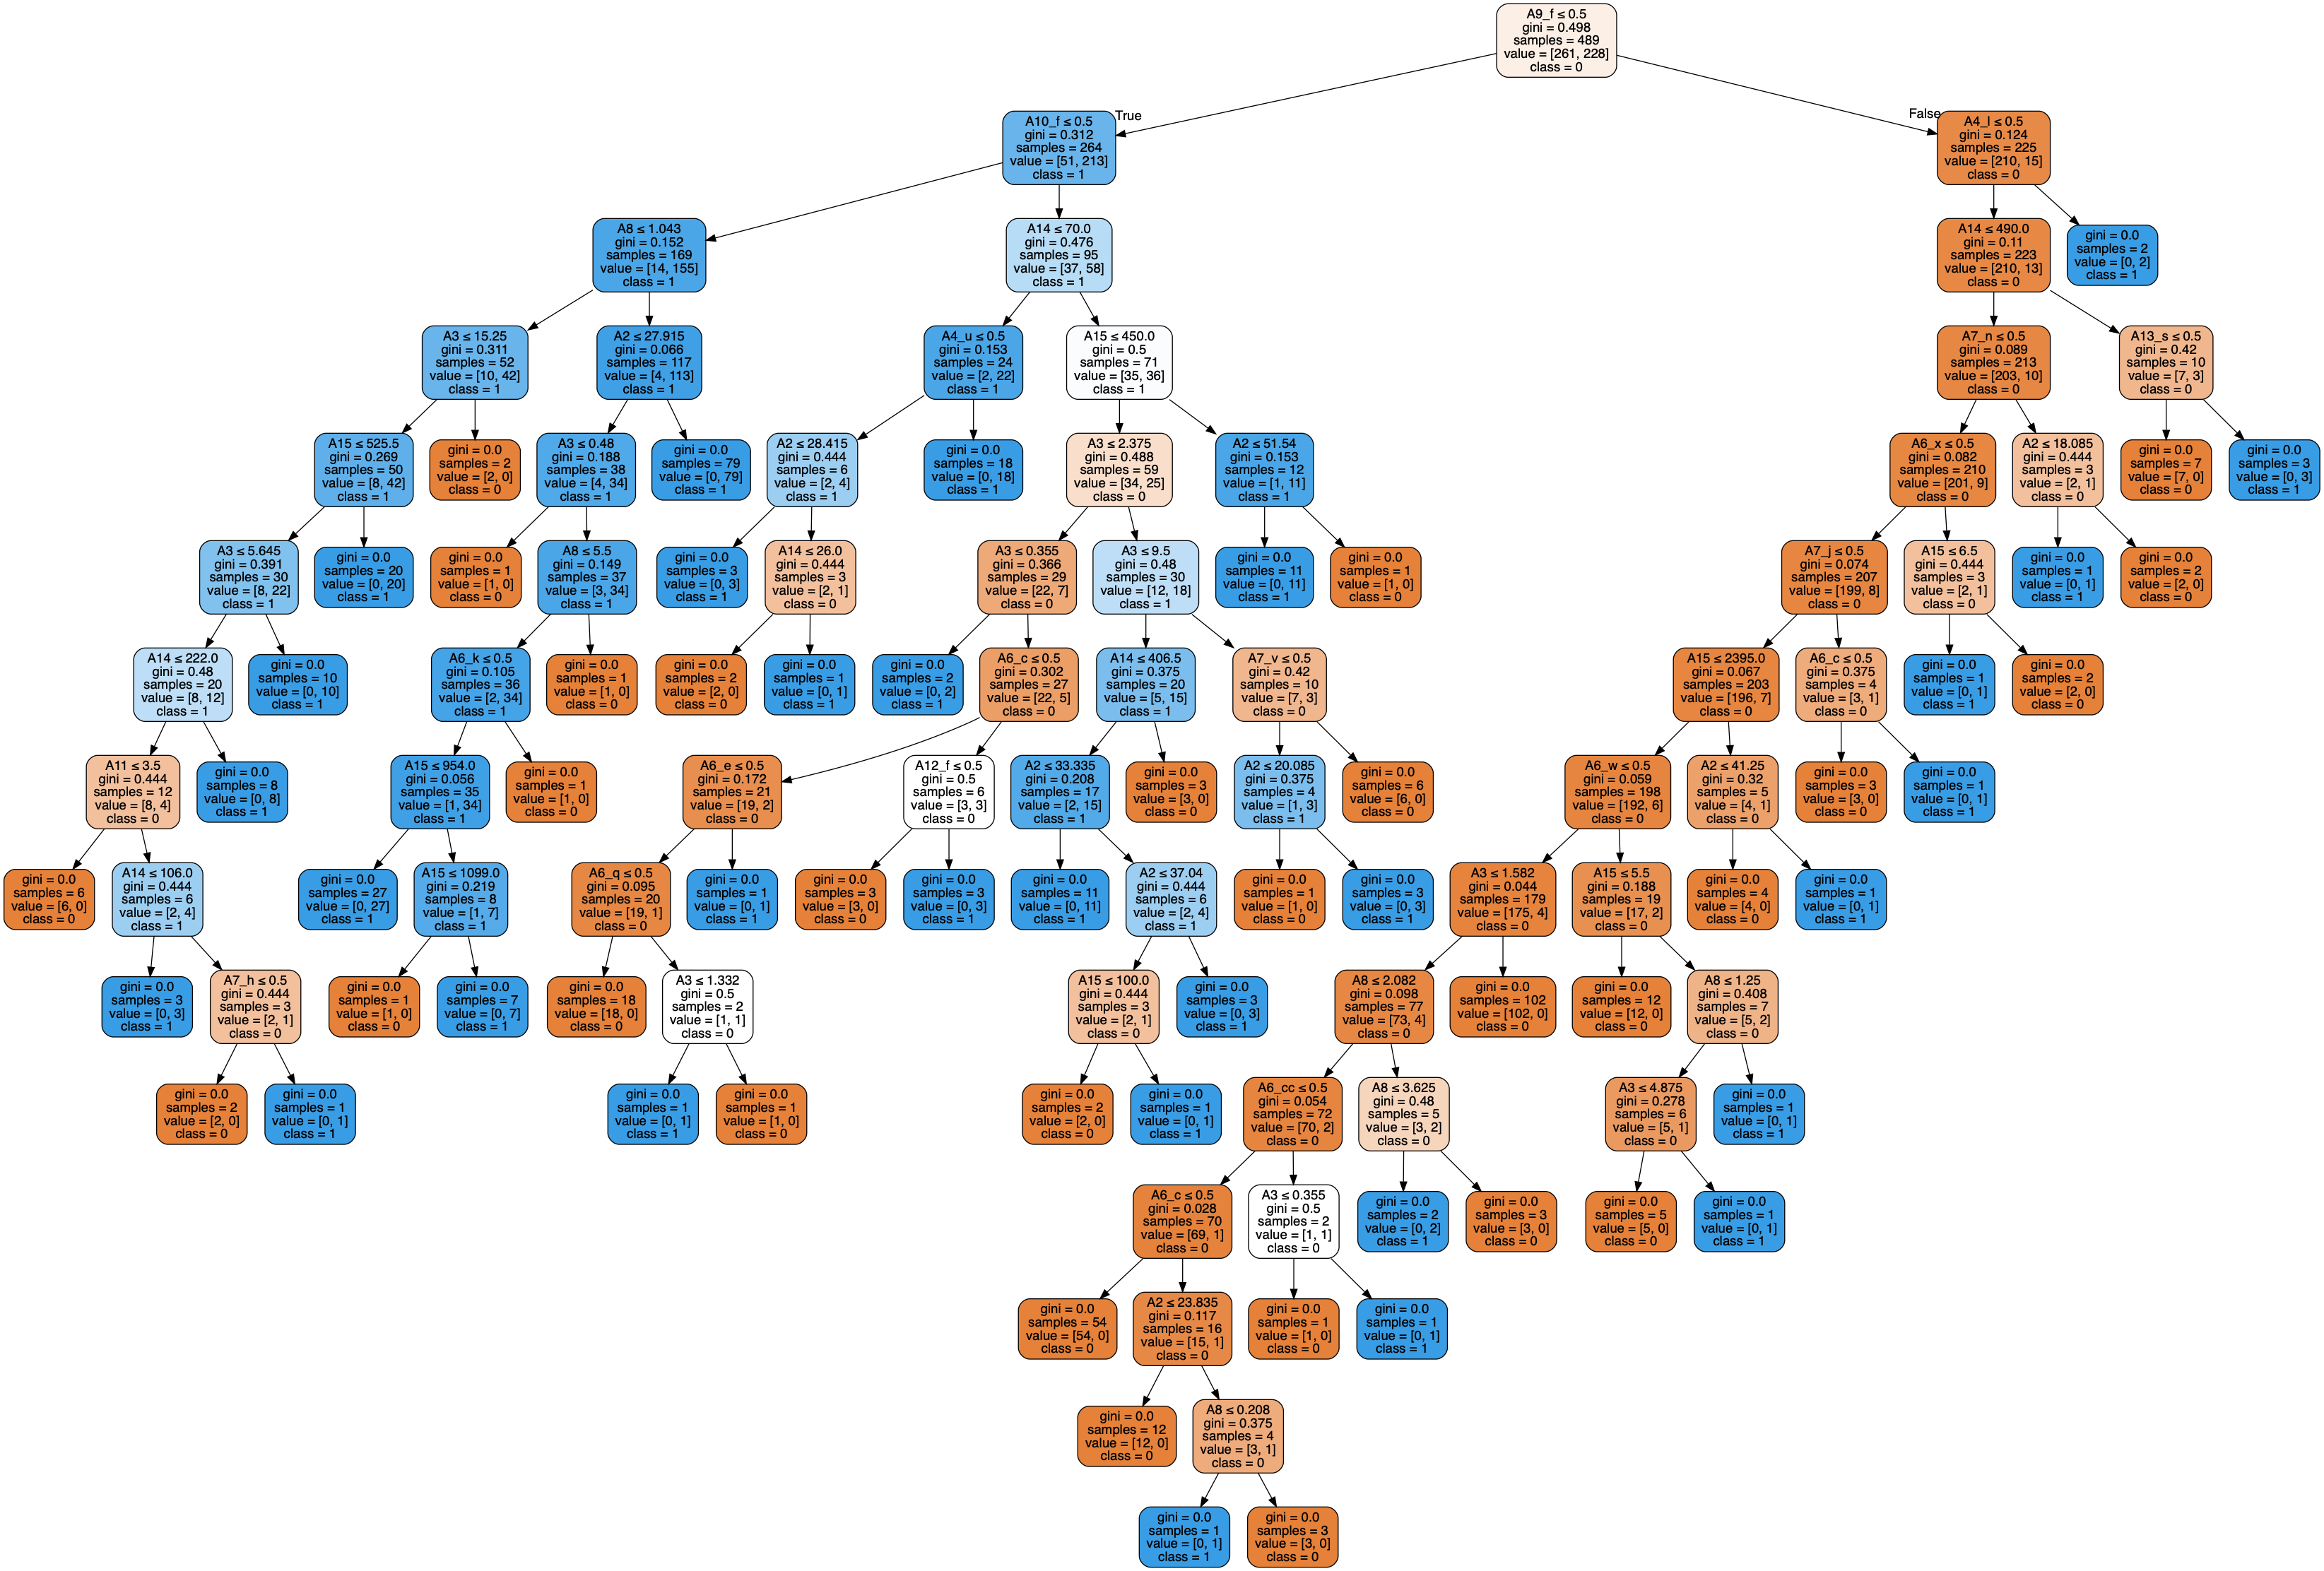

In [235]:
visualize_train(X_train, Y_train, mD=None, c="gini")

## 1.2 Test, None, Gini



	Decision Tree for X_test, Y_test 
	max_depth= None criterion= gini


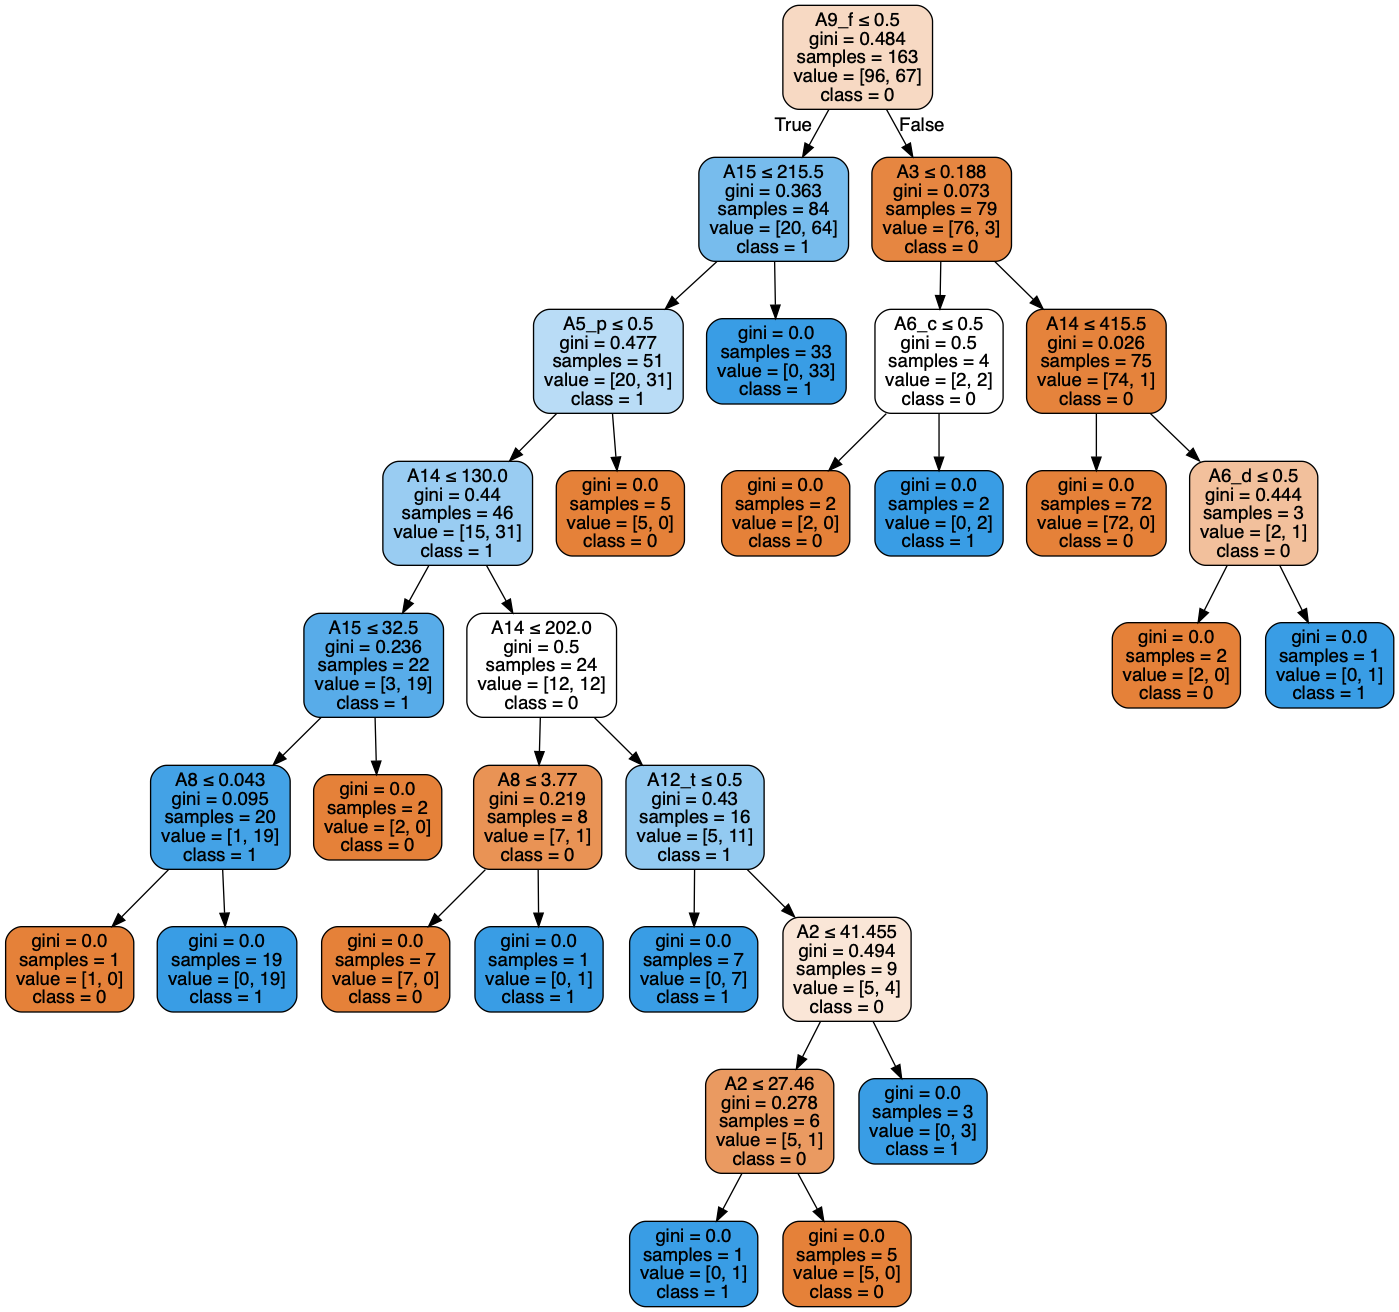

In [236]:
visualize_test(X_test, Y_test, mD=None, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 1.3 Train, None, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= None criterion= entropy


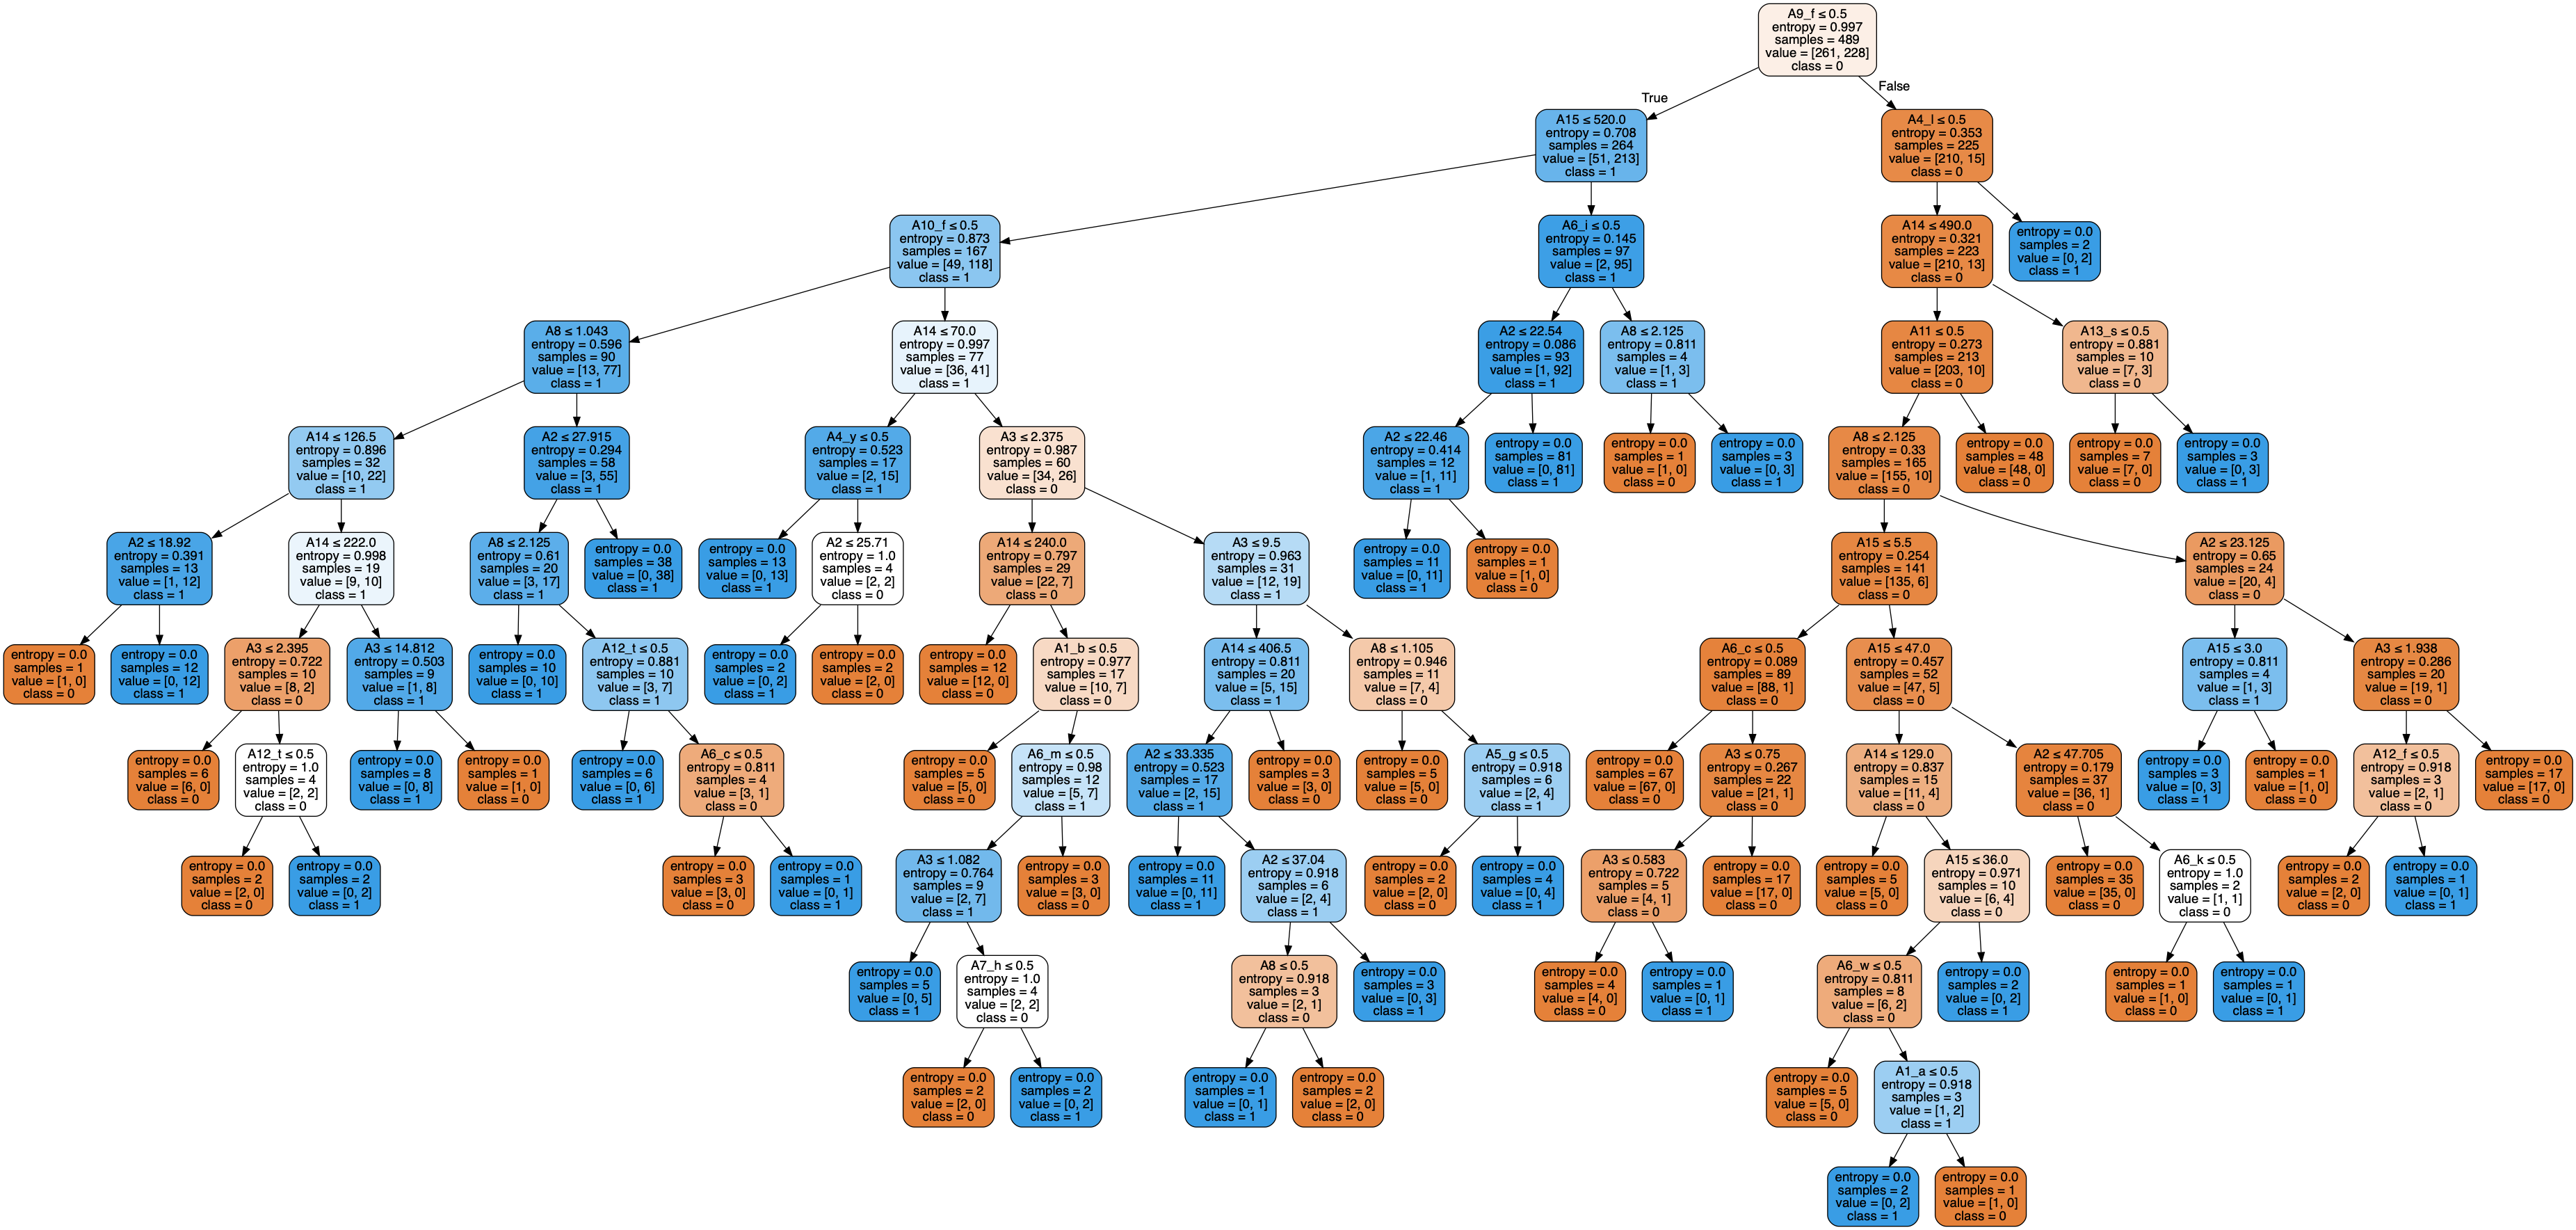

In [237]:
visualize_train(X_train, Y_train, mD=None, c="entropy")

## 1.4 Test, None, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= None criterion= entropy


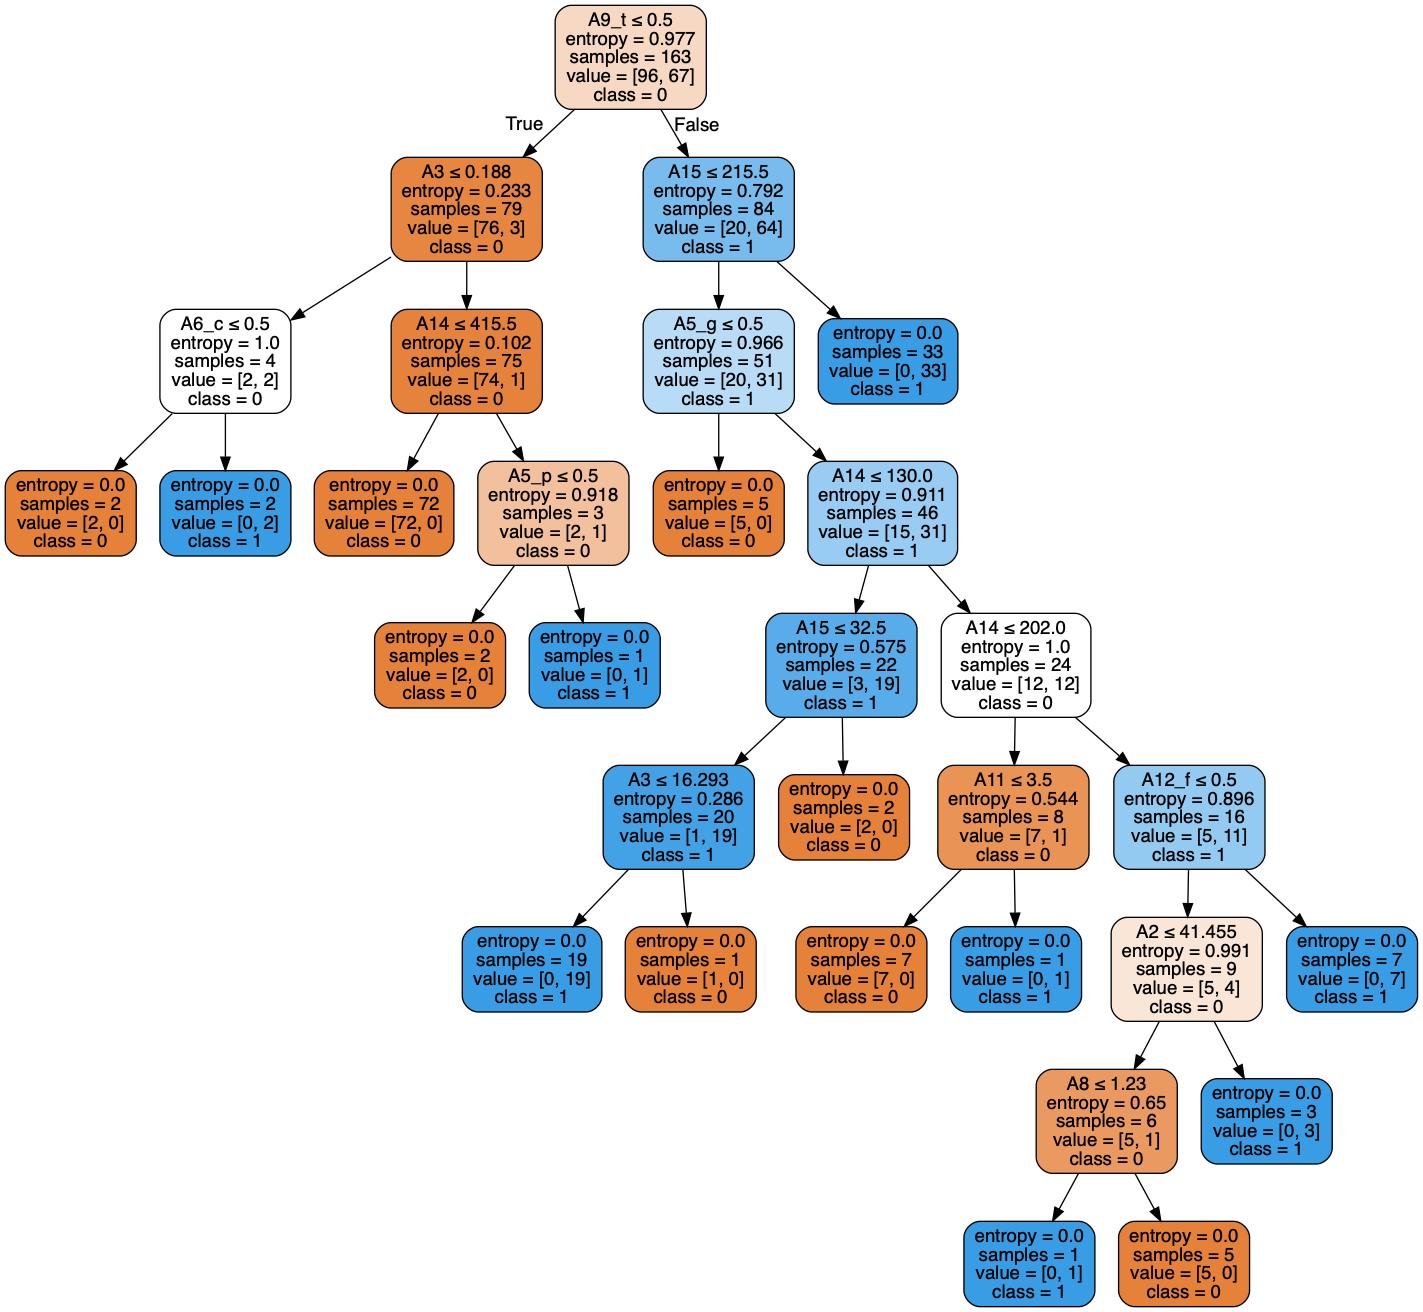

In [238]:
visualize_test(X_test, Y_test, mD=None, c="entropy")

-------------------------------------------------------------------------------------------------------------------
## 2.1 Train, 1, Gini



	Decision Tree for X_train, Y_train 
	max_depth= 1 criterion= gini


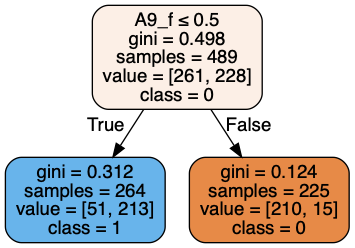

In [239]:
visualize_train(X_train, Y_train, mD=1, c="gini")

## 2.2 Test, 1, Gini



	Decision Tree for X_test, Y_test 
	max_depth= 1 criterion= gini


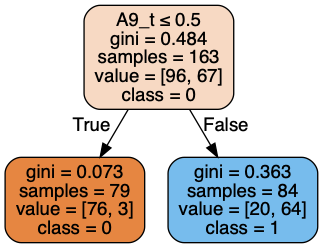

In [240]:
visualize_test(X_test, Y_test, mD=1, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 2.3 Train, 1, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= 1 criterion= entropy


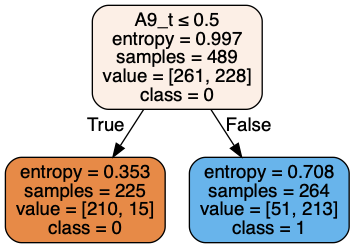

In [241]:
visualize_train(X_train, Y_train, mD=1, c="entropy")

## 2.4 Test, 1, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= 1 criterion= entropy


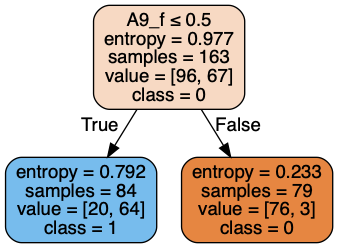

In [242]:
visualize_test(X_test, Y_test, mD=1, c="entropy")

-------------------------------------------------------------------------------------------------------------------
## 3.1 Train, 2, Gini



	Decision Tree for X_train, Y_train 
	max_depth= 2 criterion= gini


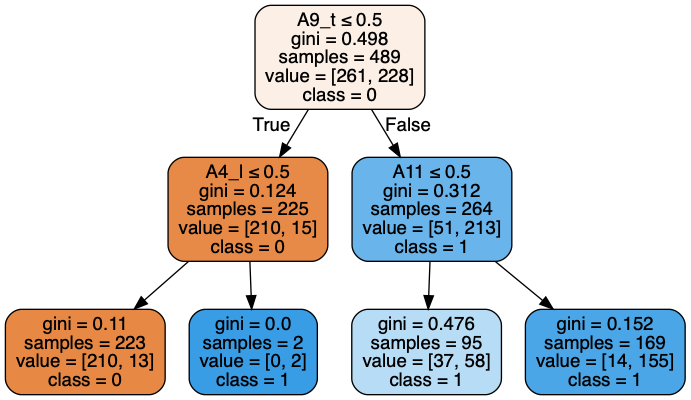

In [243]:
visualize_train(X_train, Y_train, mD=2, c="gini")

## 3.2 Test, 2, Gini



	Decision Tree for X_test, Y_test 
	max_depth= 2 criterion= gini


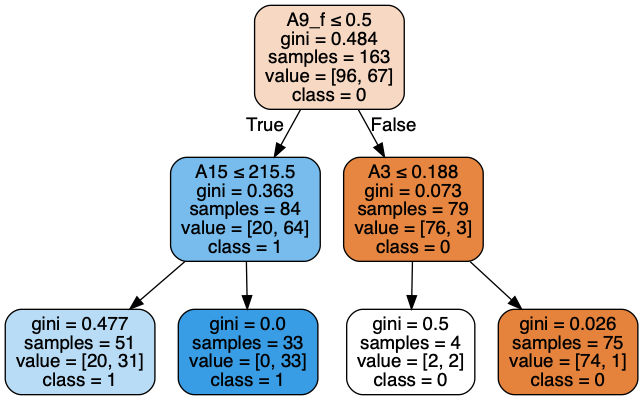

In [244]:
visualize_test(X_test, Y_test, mD=2, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 3.3 Train, 2, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= 2 criterion= entropy


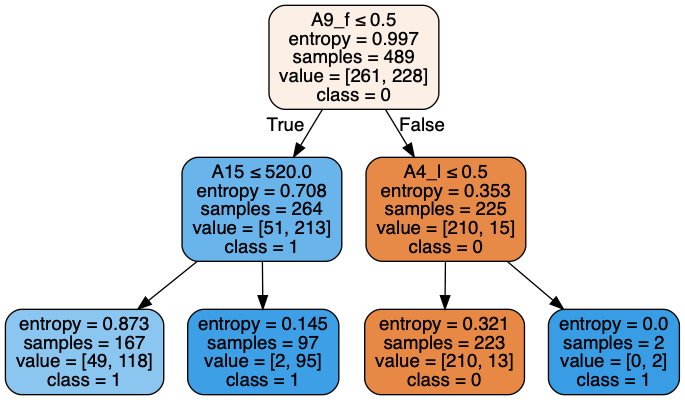

In [245]:
visualize_train(X_train, Y_train, mD=2, c="entropy")

## 3.4 Test, 2, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= 2 criterion= entropy


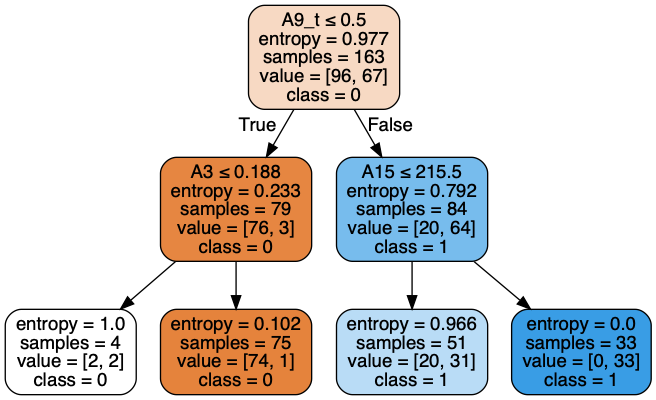

In [246]:
visualize_test(X_test, Y_test, mD=2, c="entropy")

-------------------------------------------------------------------------------------------------------------------
## 4.1 Train, 3, Gini



	Decision Tree for X_train, Y_train 
	max_depth= 3 criterion= gini


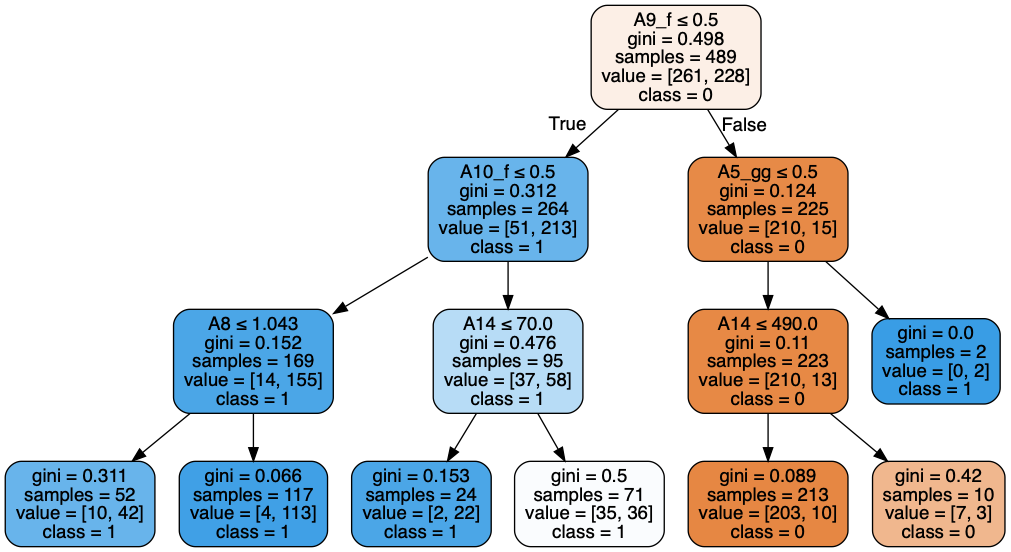

In [247]:
visualize_train(X_train, Y_train, mD=3, c="gini")

## 4.2 Test, 3, Gini



	Decision Tree for X_test, Y_test 
	max_depth= 3 criterion= gini


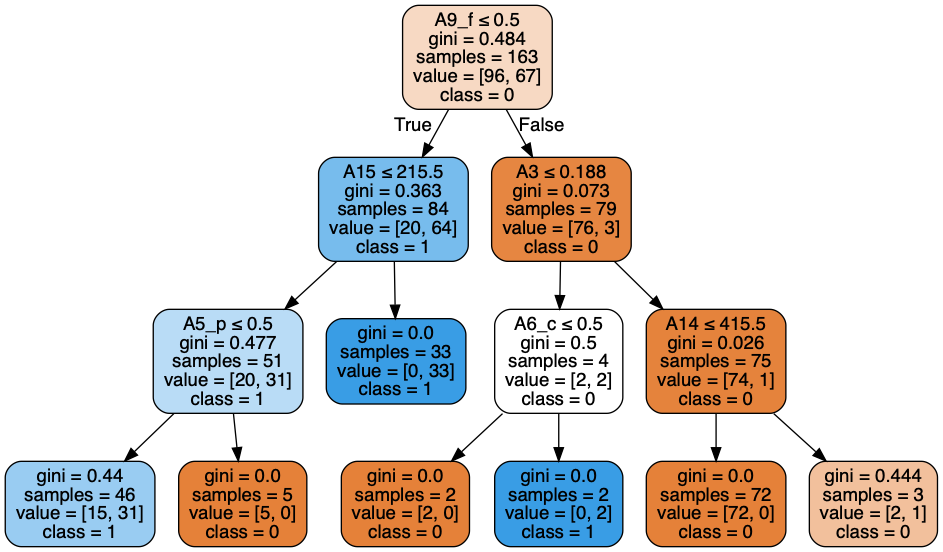

In [248]:
visualize_test(X_test, Y_test, mD=3, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 4.3 Train, 3, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= 3 criterion= entropy


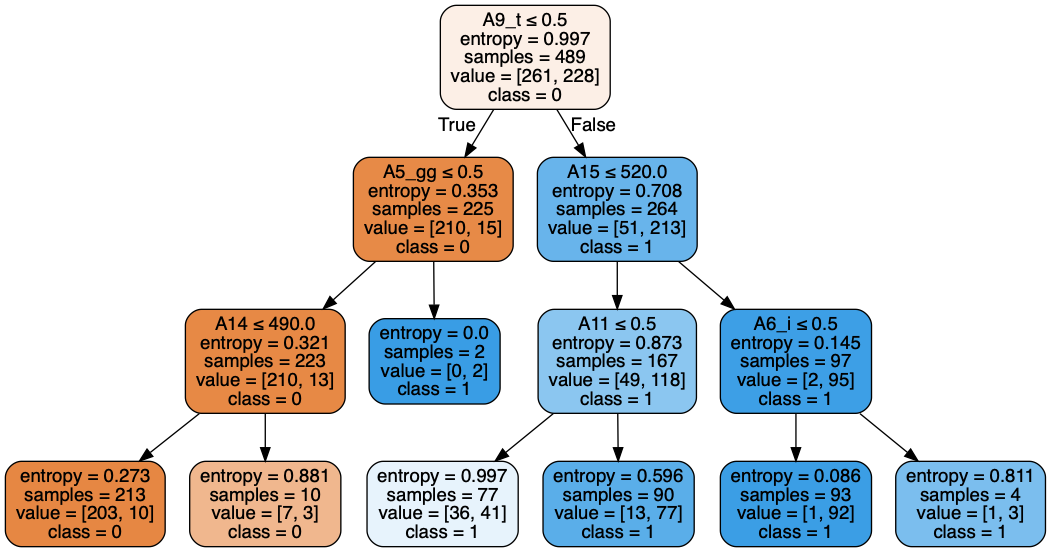

In [249]:
visualize_train(X_train, Y_train, mD=3, c="entropy")

## 4.4 Test, 3, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= 3 criterion= entropy


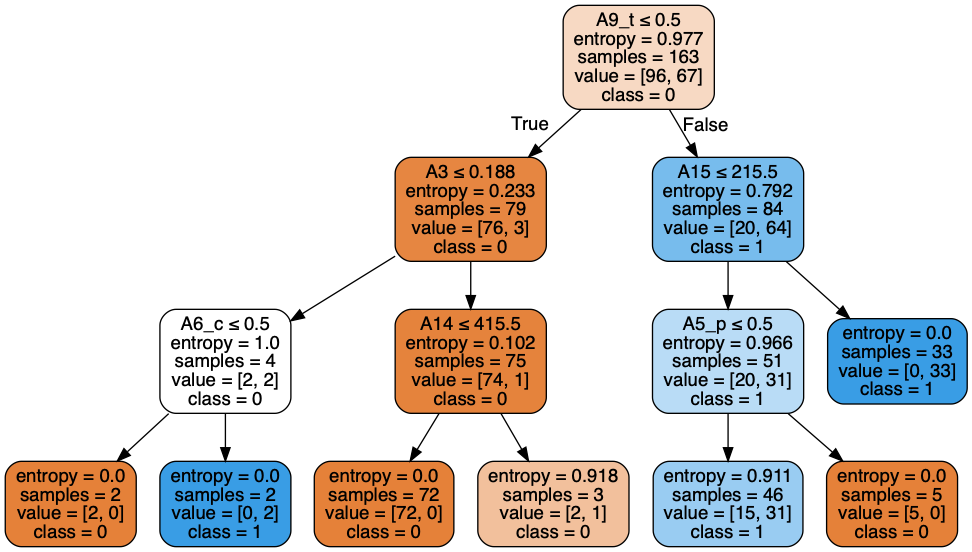

In [250]:
visualize_test(X_test, Y_test, mD=3, c="entropy")

-------------------------------------------------------------------------------------------------------------------
## 5.1 Train, 4, Gini



	Decision Tree for X_train, Y_train 
	max_depth= 4 criterion= gini


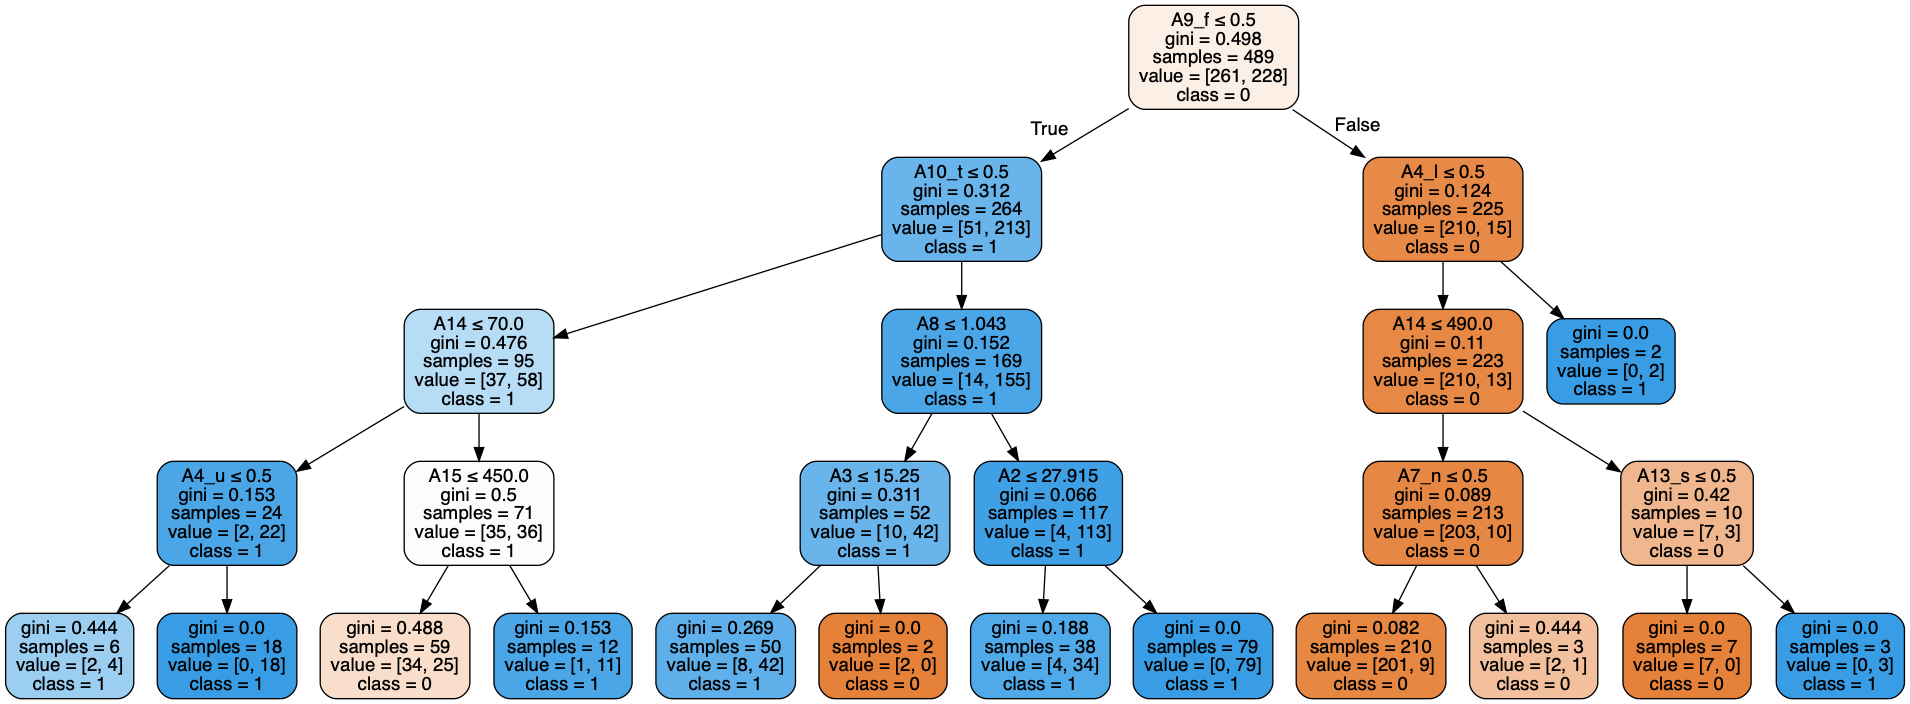

In [251]:
visualize_train(X_train, Y_train, mD=4, c="gini")

## 5.2 Test, 4, Gini



	Decision Tree for X_test, Y_test 
	max_depth= 4 criterion= gini


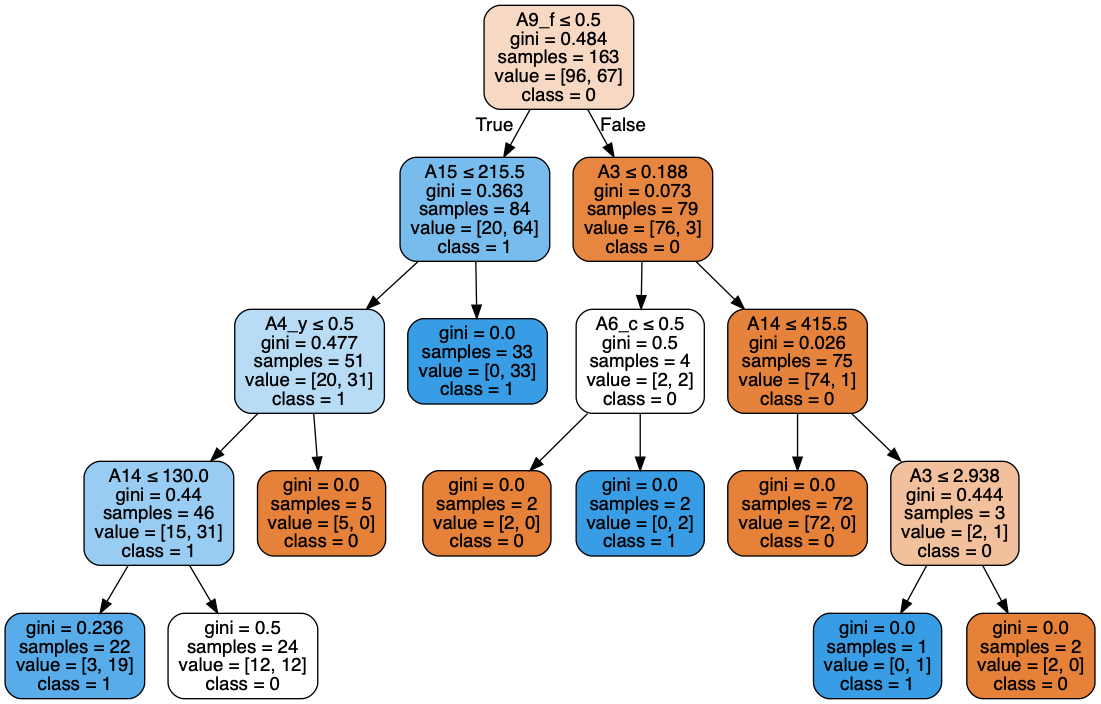

In [252]:
visualize_test(X_test, Y_test, mD=4, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 5.3 Train, 4, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= 4 criterion= entropy


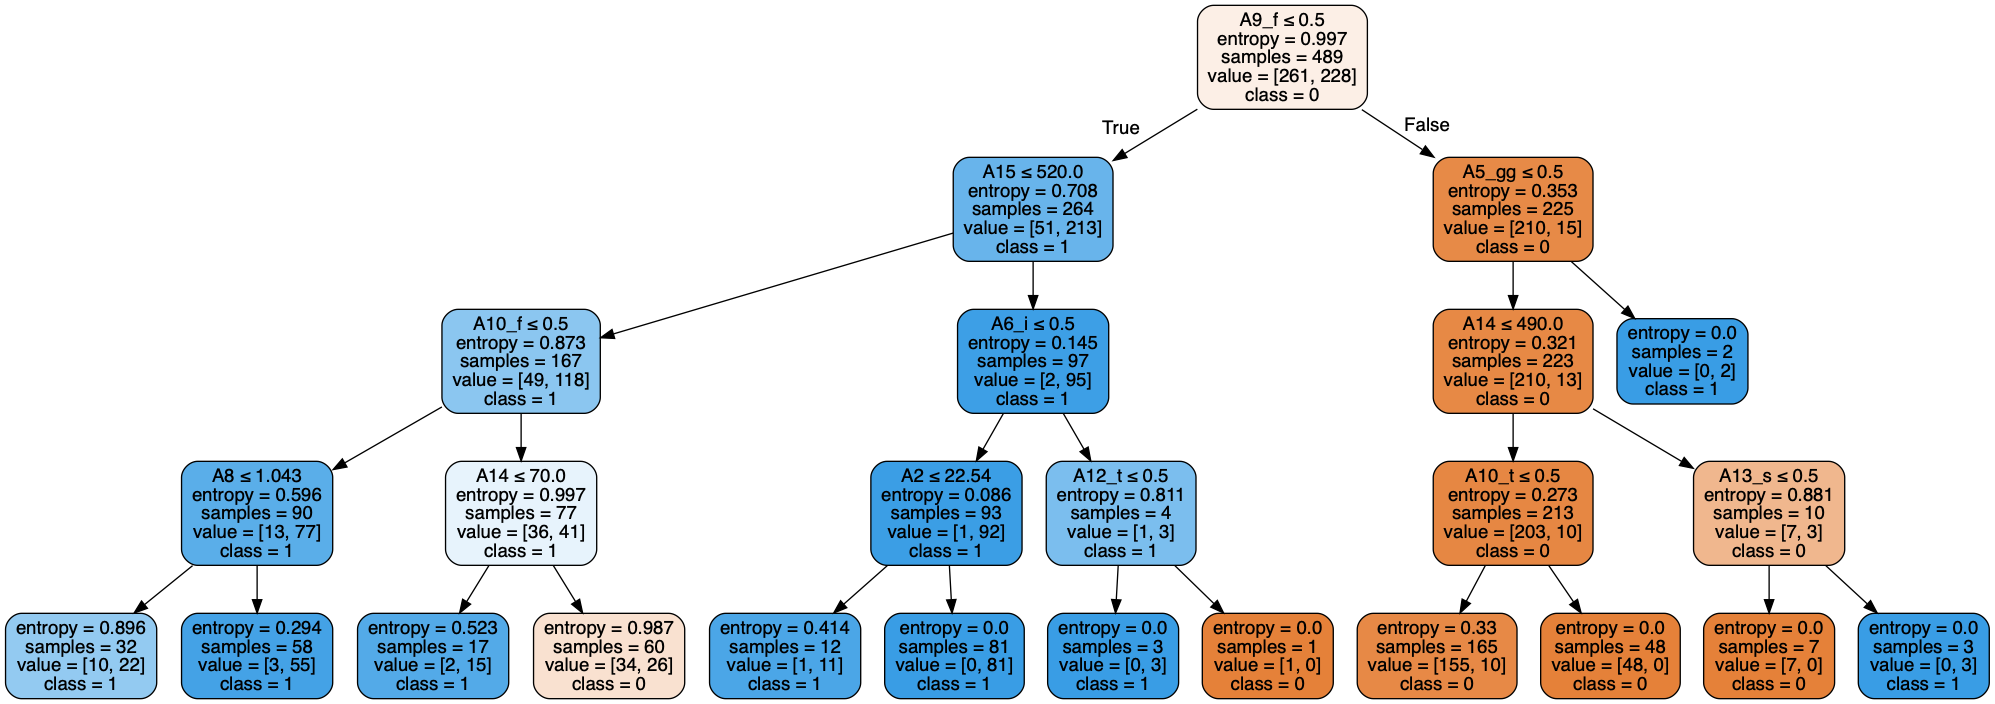

In [253]:
visualize_train(X_train, Y_train, mD=4, c="entropy")

## 5.4 Test, 4, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= 4 criterion= entropy


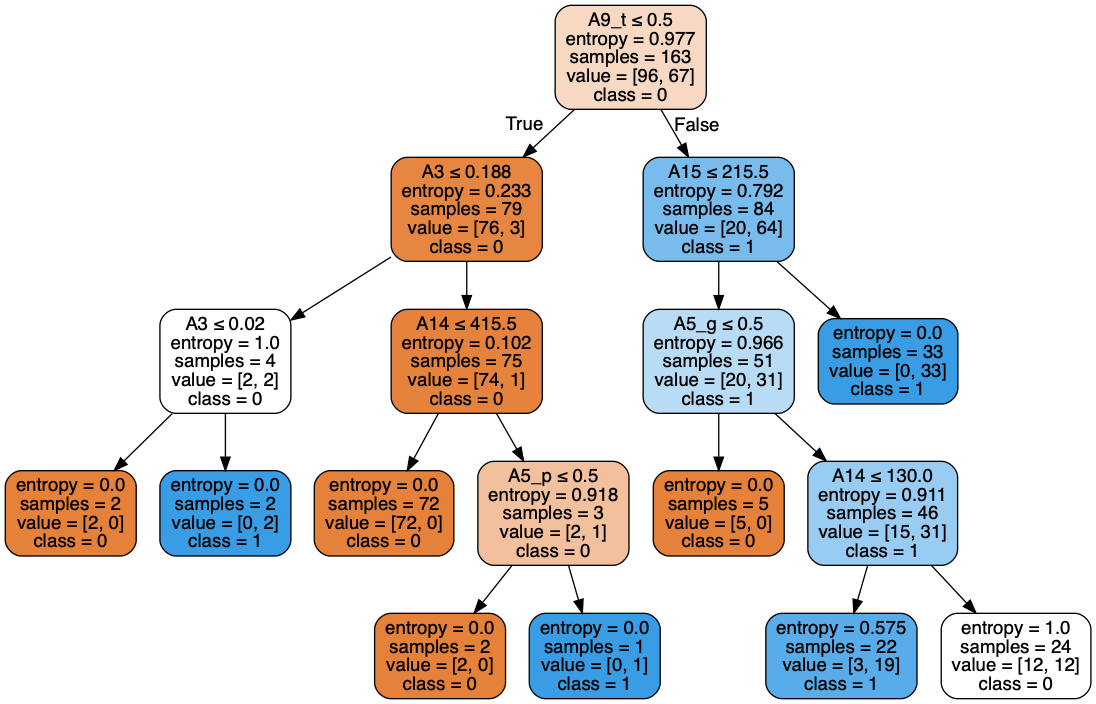

In [254]:
visualize_test(X_test, Y_test, mD=4, c="entropy")

-------------------------------------------------------------------------------------------------------------------
## 6.1 Train, 5, Gini



	Decision Tree for X_train, Y_train 
	max_depth= 5 criterion= gini


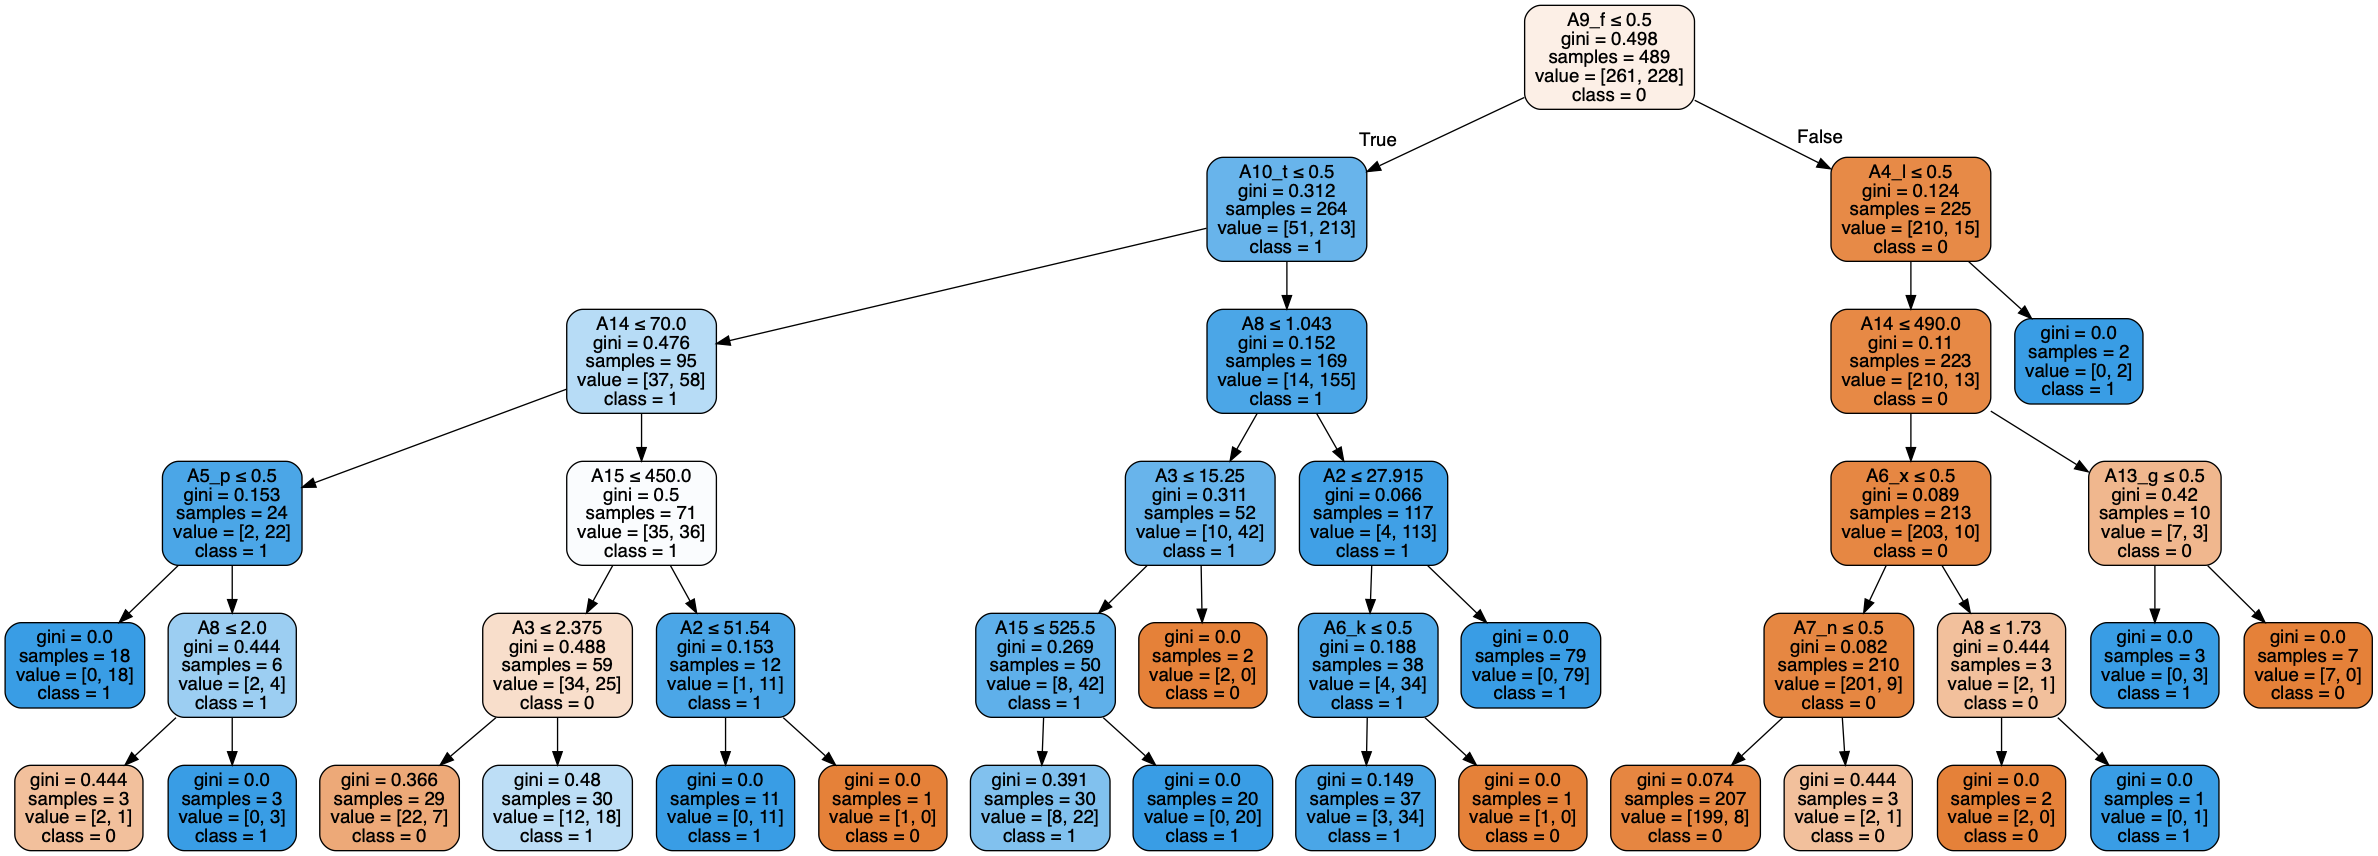

In [255]:
visualize_train(X_train, Y_train, mD=5, c="gini")

## 6.2 Test, 5, Gini



	Decision Tree for X_test, Y_test 
	max_depth= 5 criterion= gini


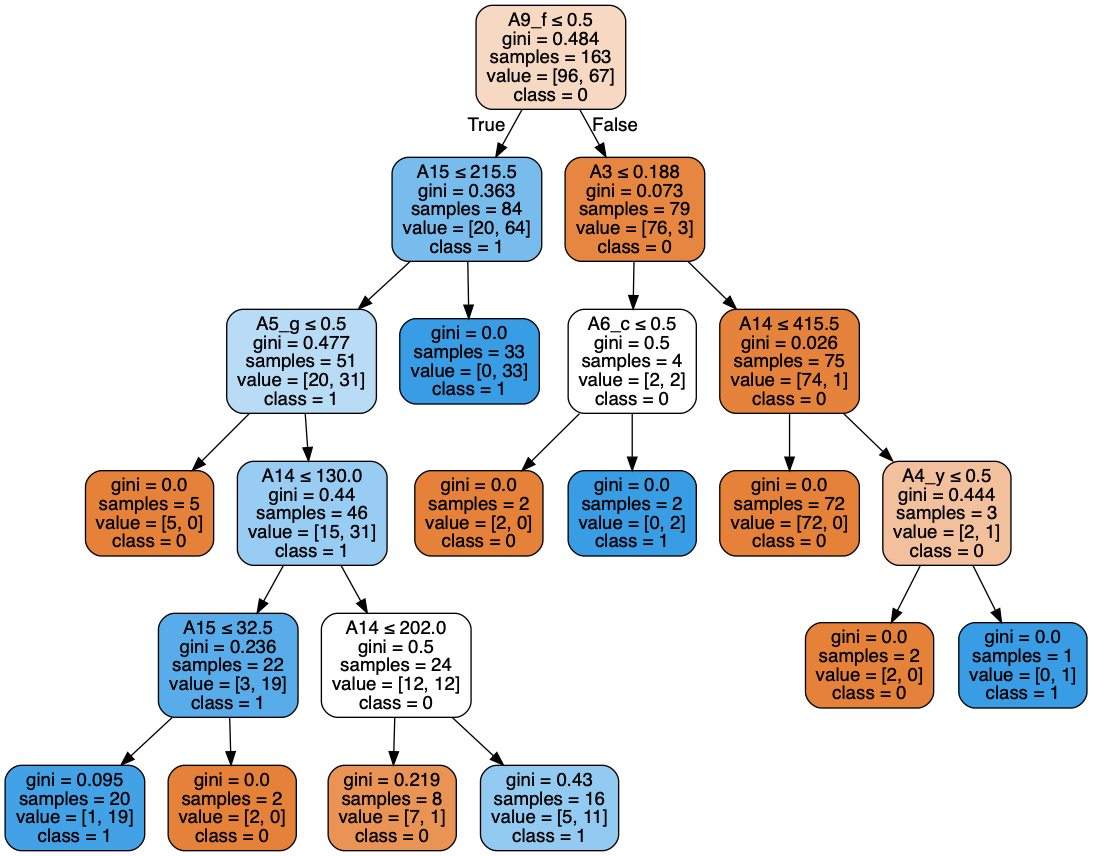

In [256]:
visualize_test(X_test, Y_test, mD=5, c="gini")

-------------------------------------------------------------------------------------------------------------------
## 6.3 Train, 5, Entropy



	Decision Tree for X_train, Y_train 
	max_depth= 5 criterion= entropy


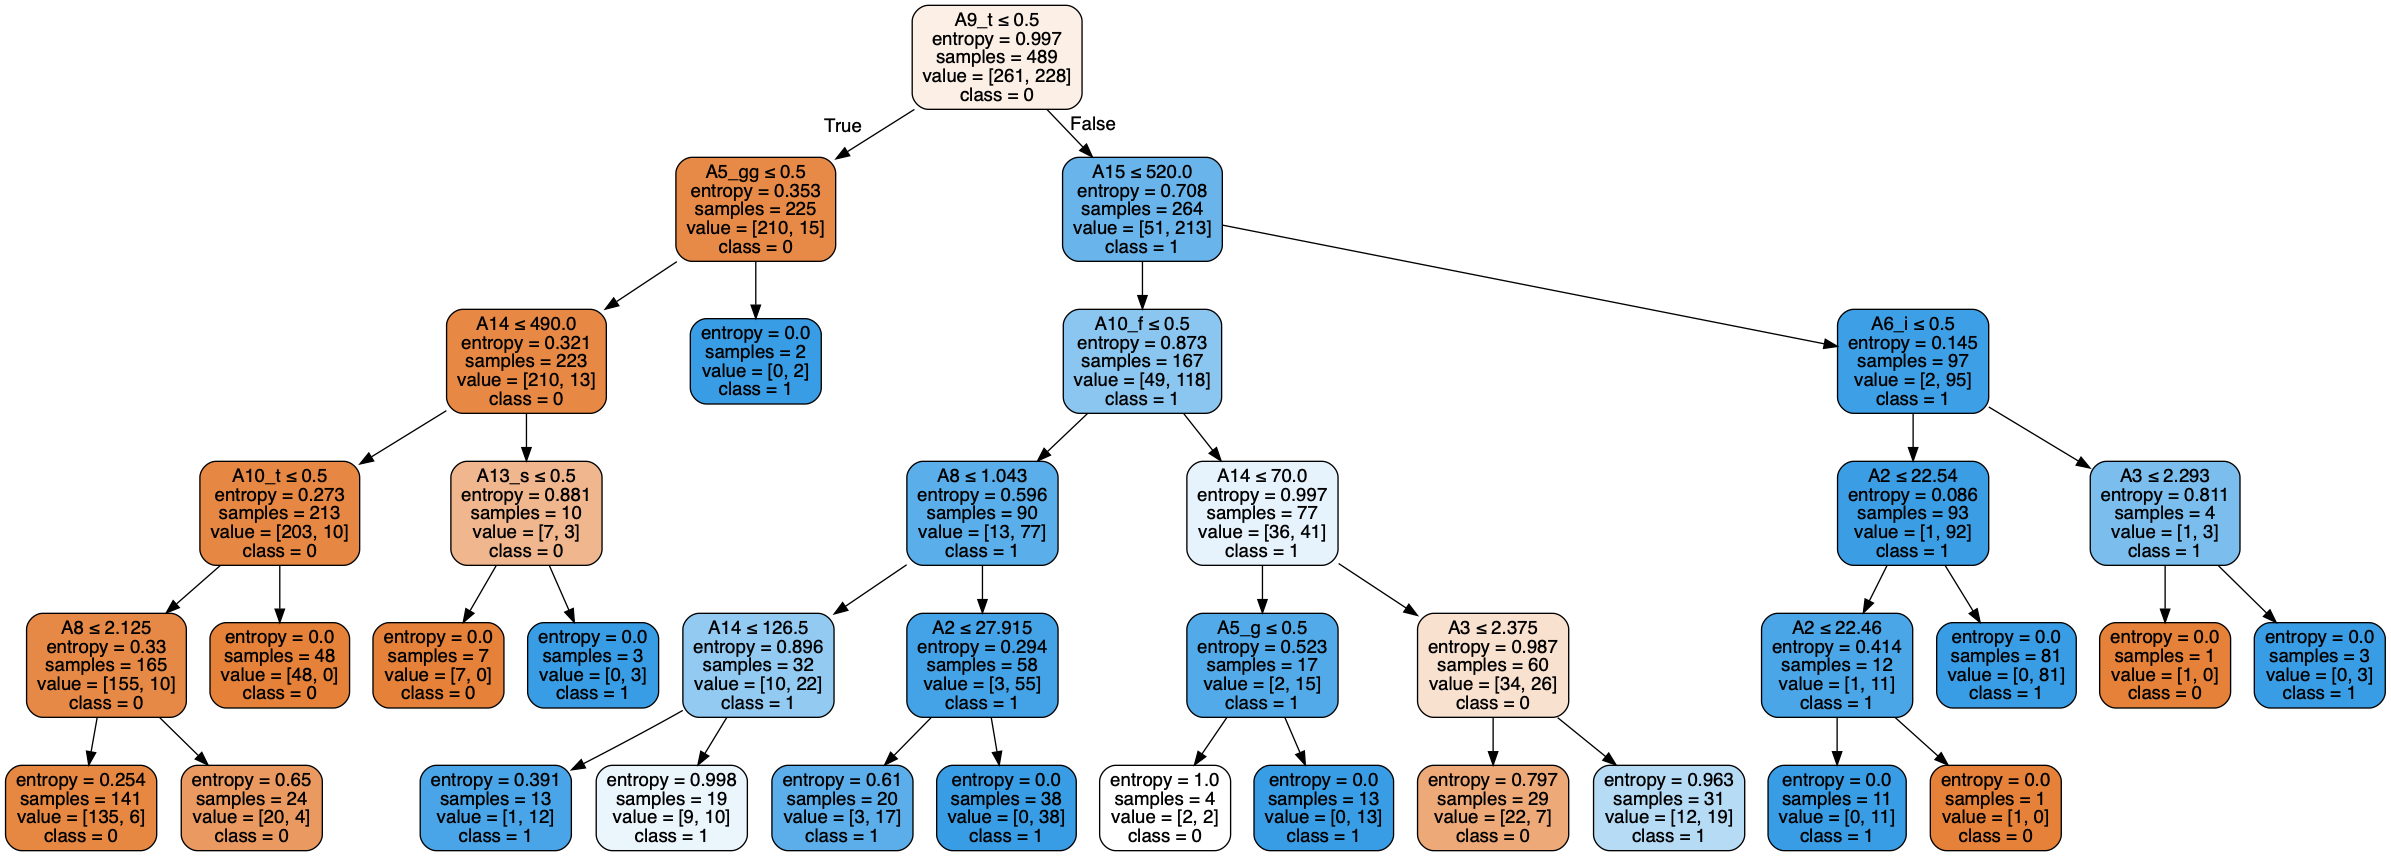

In [257]:
visualize_train(X_train, Y_train, mD=5, c="entropy")

## 6.4 Test, 5, Entropy



	Decision Tree for X_test, Y_test 
	max_depth= 5 criterion= entropy


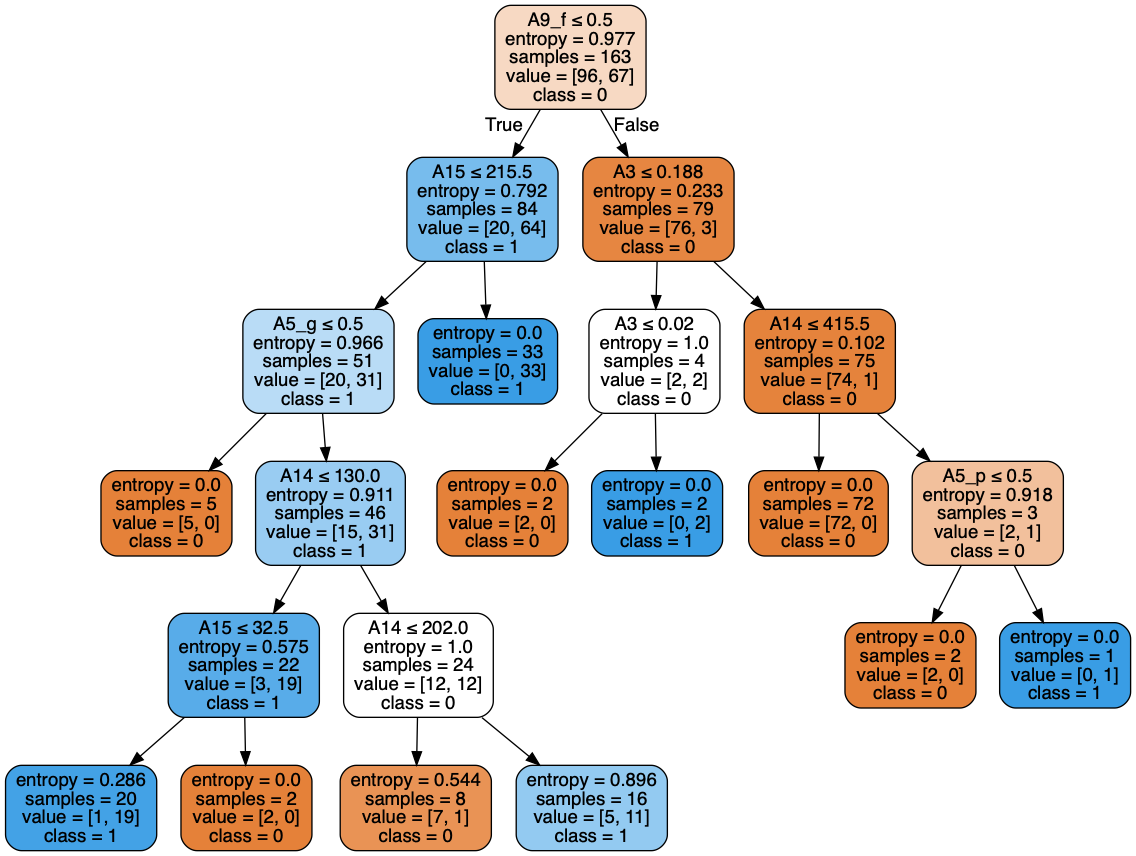

In [258]:
visualize_test(X_test, Y_test, mD=5, c="entropy")